## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import CSV data-set
df = pd.read_csv("Hotel Bookings.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

### As we can see company,agent have max number of null values


In [5]:
# filling all na values with 0 in column: children, agent and company
df[['children','agent','company']] = df[['children','agent','company']].fillna(0.0)

In [6]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [7]:
# filling all na values from country with mode of country column
# here we use to_string() because df['country'].mode() is a pandas data series so we have to convert it to a string 
df['country'].fillna(df['country'].mode().to_string(), inplace=True)

In [8]:
# look if there is no guests i.e total of adults, children and babies is zero
df[df['adults']+df['children']+df['babies'] ==0].shape

(180, 32)

In [9]:
# Drop Rows where there is no guests
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [12]:
# changing datatype from float to int in column: children, agent and company
df[['children','agent','company']] = df[['children','agent','company']].astype(int)

In [13]:
df.reservation_status_date = pd.to_datetime(df.reservation_status_date)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  int32  

# <center>Let's Analyze Column by Column

### Type Of Hotels

In [15]:
# get types of hotel
print(f"There are {len(df.hotel.unique())} type of hotels: {df.hotel.unique()[0]} & {df.hotel.unique()[1]}.")

There are 2 type of hotels: Resort Hotel & City Hotel.


Text(0.5, 1.0, 'Bookings Percentage For Types of Hotel')

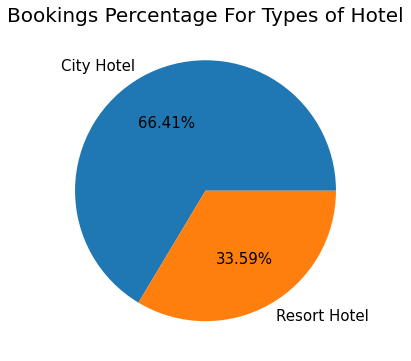

In [16]:
df.groupby('hotel').size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=20)
plt.title('Bookings Percentage For Types of Hotel', fontsize=20)

### let's analyze is_canceled column

In [17]:
df.is_canceled.unique()

array([0, 1], dtype=int64)

In [18]:
# here 0 mean No & 1 mean Yes canceled
# let's replace these into Y/N

df["is_canceled"] = df["is_canceled"].map({0:"No",1:"Yes"})

In [19]:
df.is_canceled.value_counts()

No     75011
Yes    44199
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Bookings Cancelation Status')

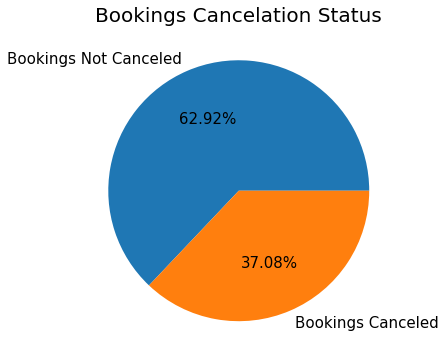

In [20]:
df.groupby('is_canceled').size().plot(kind='pie',labels=["Bookings Not Canceled","Bookings Canceled"], fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=20)
plt.title('Bookings Cancelation Status', fontsize=20)

### let's analyze between hotel and Cancelation Status

In [21]:
df.groupby(["hotel","is_canceled"]).size().unstack()

is_canceled,No,Yes
hotel,,
City Hotel,46084,33079
Resort Hotel,28927,11120


Text(0.5, 0, 'Hotel Type')

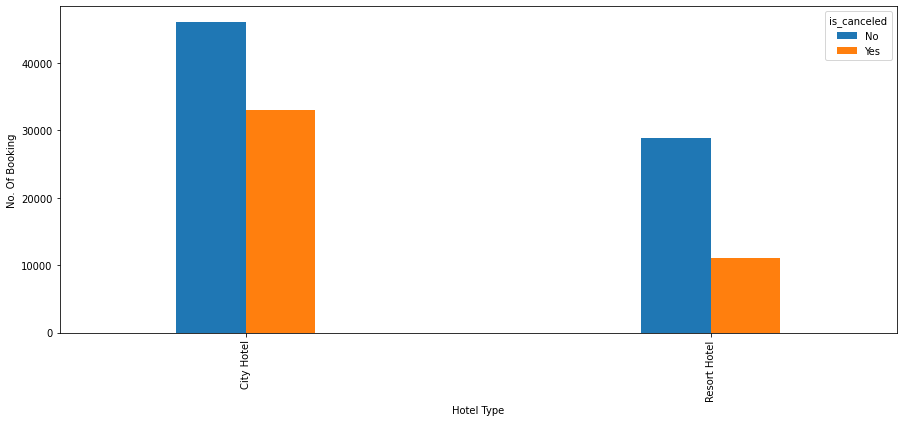

In [22]:
df.groupby(["hotel","is_canceled"]).size().unstack().plot(kind="bar",figsize=(15,6),width=.3)
plt.ylabel("No. Of Booking")
plt.xlabel("Hotel Type")

Text(0.5, 1.0, 'Bookings Status in City Hotel')

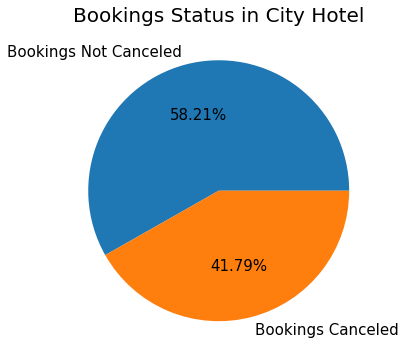

In [23]:
# let's find out the percentage of hotel cancle in both hotels
df[df["hotel"]=="City Hotel"].groupby('is_canceled').size().plot(kind='pie', labels=["Bookings Not Canceled","Bookings Canceled"], fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Bookings Status in City Hotel', fontsize=20)

Text(0.5, 1.0, 'Bookings Status in Resort Hotel')

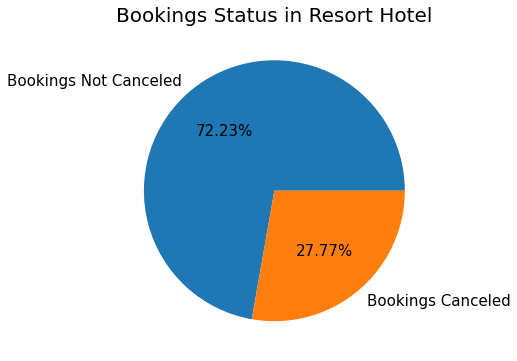

In [24]:
df[df["hotel"]=="Resort Hotel"].groupby('is_canceled').size().plot(kind='pie', labels=["Bookings Not Canceled","Bookings Canceled"], fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Bookings Status in Resort Hotel', fontsize=20)

### As we can see the city hotels have most number of cancellation

### let's analyze lead_time column

In [25]:
same_day_booking= round(df['lead_time'].value_counts(normalize=True) * 100, 2)[0]
print(f"Same day bookings are {same_day_booking}%")

Same day bookings are 5.25%


In [26]:
within_week_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:8].sum(), 0)
print(f"Within a week bookings are {within_week_booking}%")
within_month_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:31].sum(), 0)
print(f"Within a month bookings are {within_month_booking}%")
within_3_months_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:91].sum(), 0)
print(f"Within 3 months bookings are {within_3_months_booking}%")
within_6_months_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:181].sum(), 0)
print(f"Within 6 months bookings are {within_6_months_booking}%")
within_year_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:366].sum(), 0)
print(f"Within a year bookings are {within_year_booking}%")

Within a week bookings are 11.0%
Within a month bookings are 27.0%
Within 3 months bookings are 52.0%
Within 6 months bookings are 75.0%
Within a year bookings are 93.0%


### let's analyze arrival_date_year column

Text(0, 0.5, 'Booking Year wise')

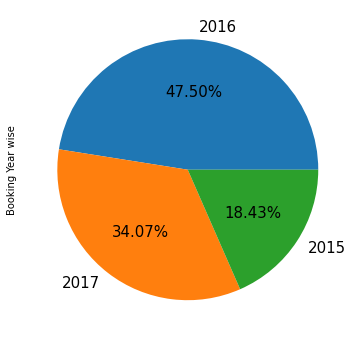

In [27]:
df.arrival_date_year.value_counts().plot(kind="pie",fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel("Booking Year wise")

Text(0, 0.5, 'No. of Bookings')

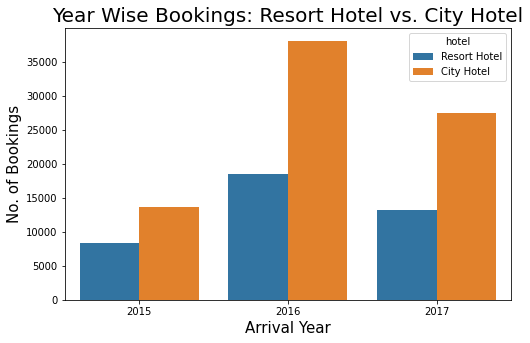

In [28]:
import seaborn as sns
# year wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (8,5)
sns.countplot(data = df, x = 'arrival_date_year', hue = 'hotel')
plt.title('Year Wise Bookings: Resort Hotel vs. City Hotel',fontsize=20)
plt.xlabel('Arrival Year', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

### **Column:** arrival_date_month

Text(0.5, 1.0, 'Stays in weekend nights Vs. Bookings')

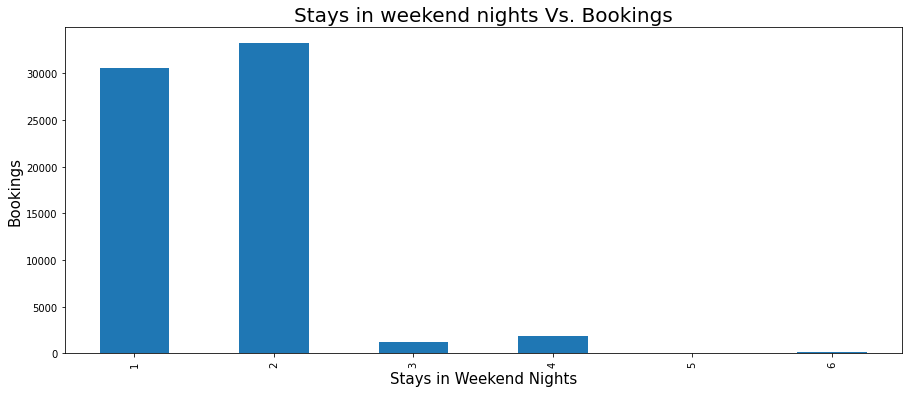

In [29]:
df['stays_in_weekend_nights'].value_counts().sort_index()[1:7].plot(kind='bar', figsize=(15,6))
plt.xlabel('Stays in Weekend Nights' , fontsize=15)
plt.ylabel('Bookings' , fontsize=15)
plt.title('Stays in weekend nights Vs. Bookings', fontsize=20)

Text(0, 0.5, 'No. of Bookings')

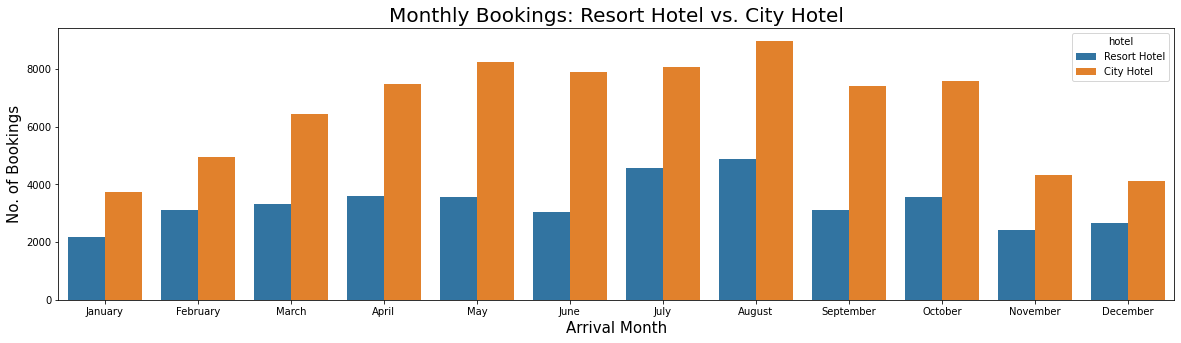

In [30]:
# Month wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', order= [ 'January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Bookings: Resort Hotel vs. City Hotel',fontsize=20)
plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

### **Column:** stays_in_weekend_nights

Text(0.5, 1.0, 'Monthly Bookings count')

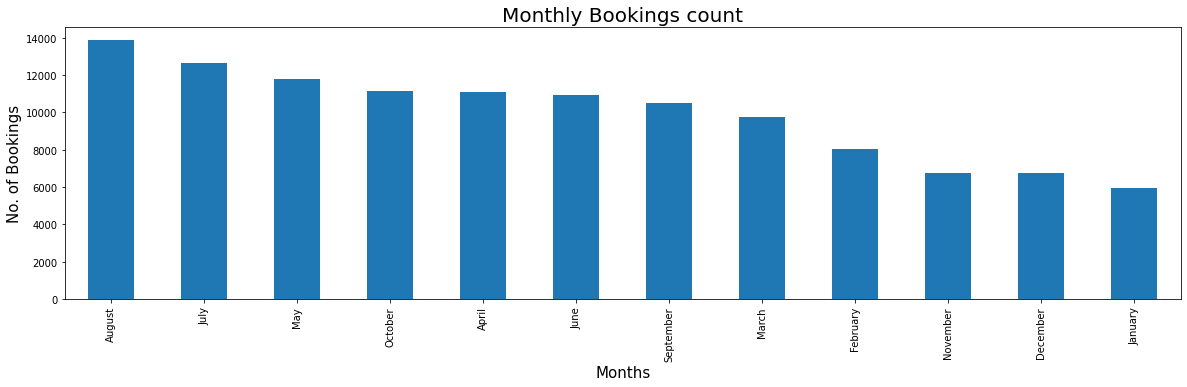

In [31]:
df['arrival_date_month'].value_counts().plot(kind='bar', figsize=(20,5))
plt.xlabel('Months' , fontsize=15)
plt.ylabel('No. of Bookings' , fontsize=15)
plt.title('Monthly Bookings count', fontsize=20)

### **Column:**stays_in_week_nights

Text(0.5, 1.0, 'Stays in week nights Vs. Bookings')

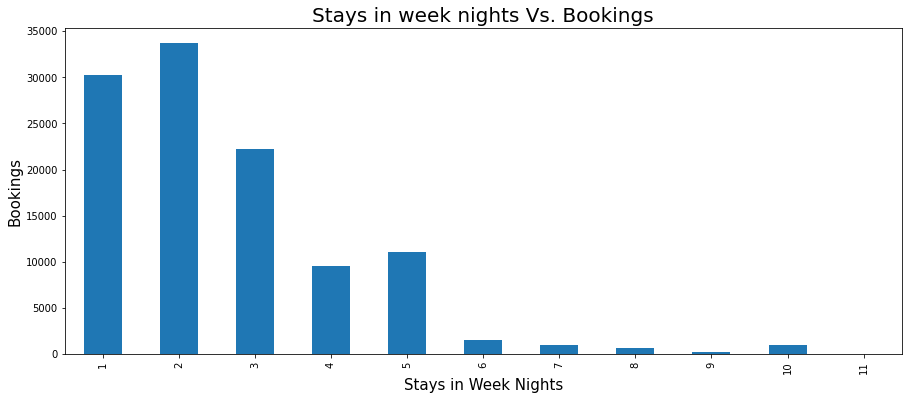

In [32]:
df['stays_in_week_nights'].value_counts().sort_index()[1:12].plot(kind='bar', figsize=(15,6))
plt.xlabel('Stays in Week Nights' , fontsize=15)
plt.ylabel('Bookings' , fontsize=15)
plt.title('Stays in week nights Vs. Bookings', fontsize=20)

**Question:** Which type of meal was prefered mostly?

Text(0, 0.5, '')

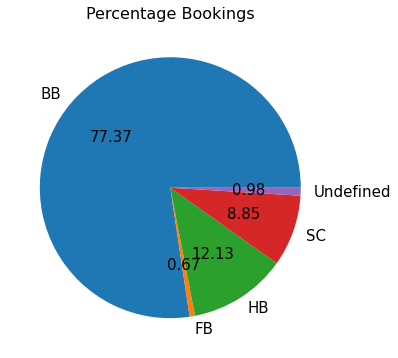

In [33]:
df.groupby('meal').size().plot(kind='pie', labels=["BB", "FB", "HB", "SC", "Undefined"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.title('Percentage Bookings', fontsize=16)
plt.ylabel('')

## **`Column:`** country

Text(0, 0.5, 'No. of Bookings')

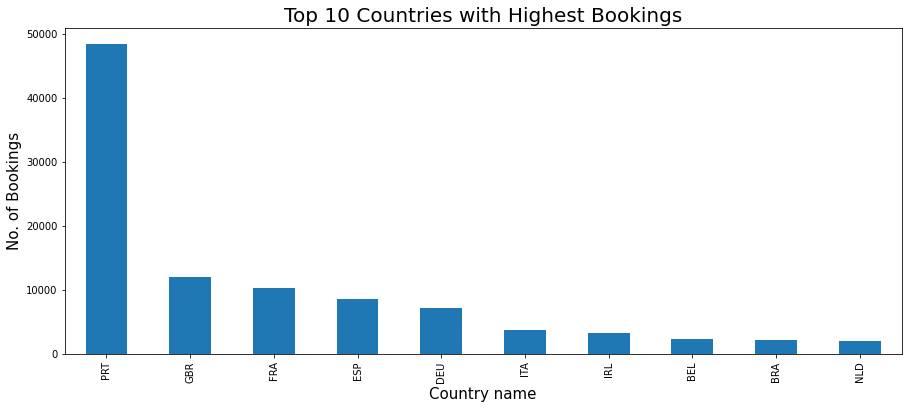

In [34]:
df['country'].value_counts()[:10].plot(kind='bar', figsize=(15,6))
plt.title('Top 10 Countries with Highest Bookings', fontsize=20)
plt.xlabel('Country name', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

**Question:** Top 10 countries weightage in total bookings?

In [35]:
weightage_of_top_10_countries_in_bookings = (df['country'].value_counts(normalize=True)*100)[:10].sum()
print(f"Above top 10 countries with highest bookings had weightage of {round(weightage_of_top_10_countries_in_bookings, 2)}% in total bookings.")

Above top 10 countries with highest bookings had weightage of 84.43% in total bookings.


## **Column:** market_segment

Text(0, 0.5, 'Percentage Bookings')

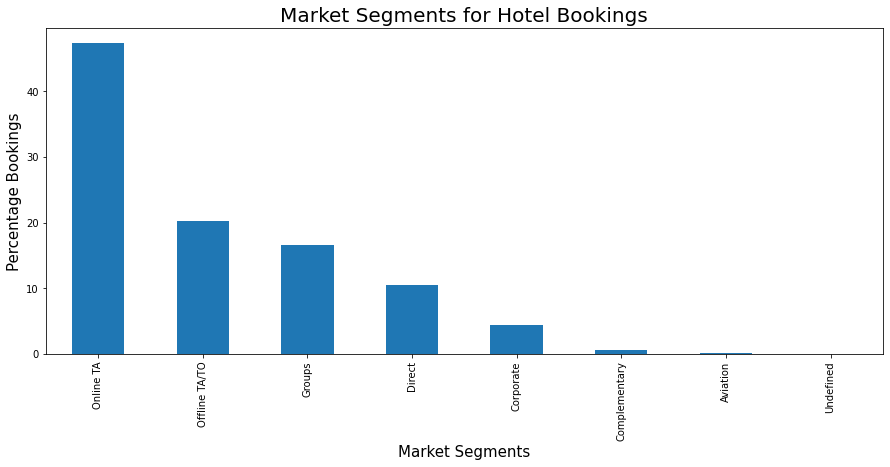

In [36]:
round(df['market_segment'].value_counts(normalize=True) * 100, 2).plot(kind='bar', figsize=(15,6))
plt.title('Market Segments for Hotel Bookings', fontsize=20)
plt.xlabel('Market Segments', fontsize=15)
plt.ylabel('Percentage Bookings', fontsize=15)

In [37]:
round(df['market_segment'].value_counts(normalize=True) * 100, 2)

Online TA        47.32
Offline TA/TO    20.29
Groups           16.60
Direct           10.55
Corporate         4.43
Complementary     0.61
Aviation          0.20
Undefined         0.00
Name: market_segment, dtype: float64

## **Column:** distribution_channel

Text(0, 0.5, 'Percentage Bookings')

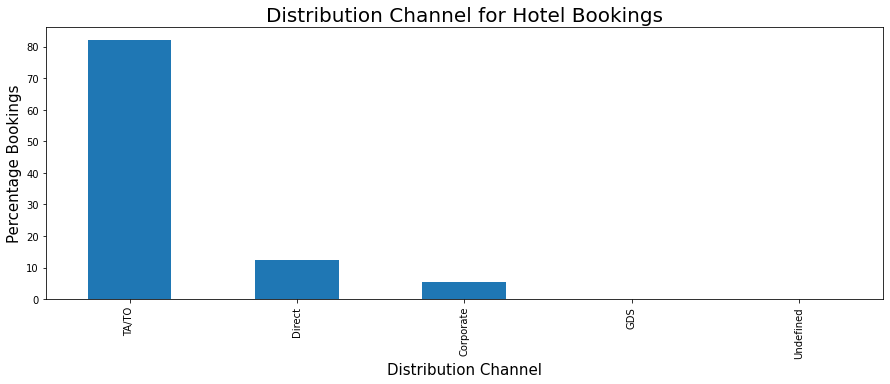

In [38]:
round(df['distribution_channel'].value_counts(normalize=True) * 100, 2).plot(kind='bar', figsize=(15,5))
plt.title('Distribution Channel for Hotel Bookings', fontsize=20)
plt.xlabel('Distribution Channel', fontsize=15)
plt.ylabel('Percentage Bookings', fontsize=15)

## **Column:** is_repeated_guest

In [39]:
df.is_repeated_guest.unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Guest Repeated Or Not')

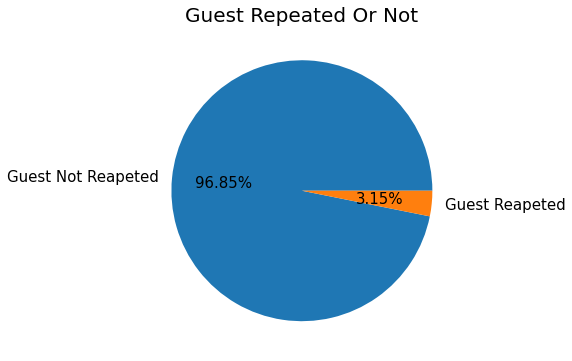

In [40]:
df.groupby('is_repeated_guest').size().plot(kind='pie', labels=['Guest Not Reapeted', 'Guest Reapeted'], fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=15)
plt.title('Guest Repeated Or Not', fontsize=20)

## **Column:** booking_changes

Text(0.5, 0, 'No. of Changes Made')

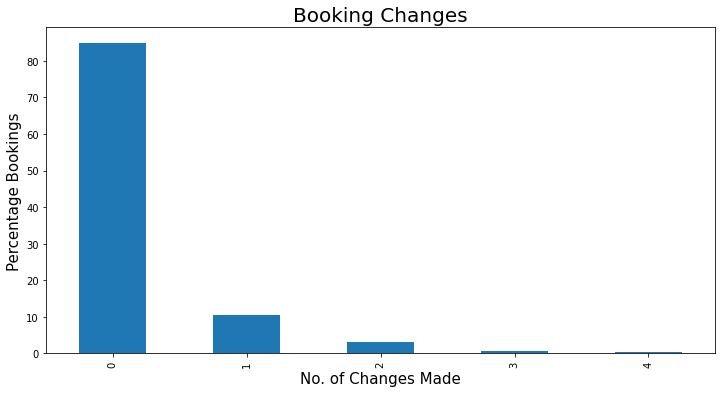

In [41]:
round(df['booking_changes'].value_counts(normalize=True) * 100, 2)[0:5].plot(kind='bar', figsize=(12,6))
plt.title('Booking Changes', fontsize=20)
plt.ylabel('Percentage Bookings', fontsize=15)
plt.xlabel('No. of Changes Made', fontsize=15)

## **`Column:`** deposit_type

In [42]:
df.deposit_type.value_counts()

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [43]:
round(df['deposit_type'].value_counts(normalize=True) * 100, 2)

No Deposit    87.63
Non Refund    12.24
Refundable     0.14
Name: deposit_type, dtype: float64

Text(0.5, 1.0, 'Types of Deposit')

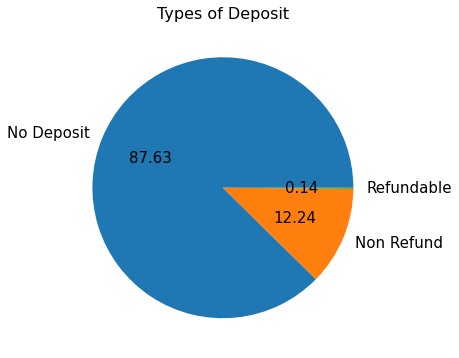

In [44]:
df.groupby('deposit_type').size().plot(kind='pie', fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Types of Deposit', fontsize=16)

## **Column:** days_in_waiting_list

In [45]:
df['days_in_waiting_list'].value_counts()[:5]

0     115517
39       227
58       164
44       141
31       127
Name: days_in_waiting_list, dtype: int64

In [46]:
round(df['days_in_waiting_list'].value_counts(normalize=True) * 100, 2)[:5].sort_index().reset_index()

,index,days_in_waiting_list
0,0,96.90
1,31,0.11
2,39,0.19
3,44,0.12
4,58,0.14


## **Column:** required_car_parking_spaces

In [47]:
round(df['required_car_parking_spaces'].value_counts(normalize=True) * 100, 2).reset_index()

,index,required_car_parking_spaces
0,0,93.78
1,1,6.19
2,2,0.02
3,3,0.00
4,8,0.00


## **Column:** reservation_status

Text(0.5, 1.0, 'Reservation Status')

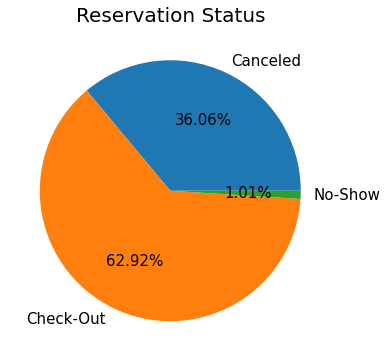

In [48]:
df.groupby('reservation_status').size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Reservation Status', fontsize=20)

## **Q1:** Have you ever wondered when the best time of year to book a hotel room is? 

Text(0, 0.5, 'Average adr')

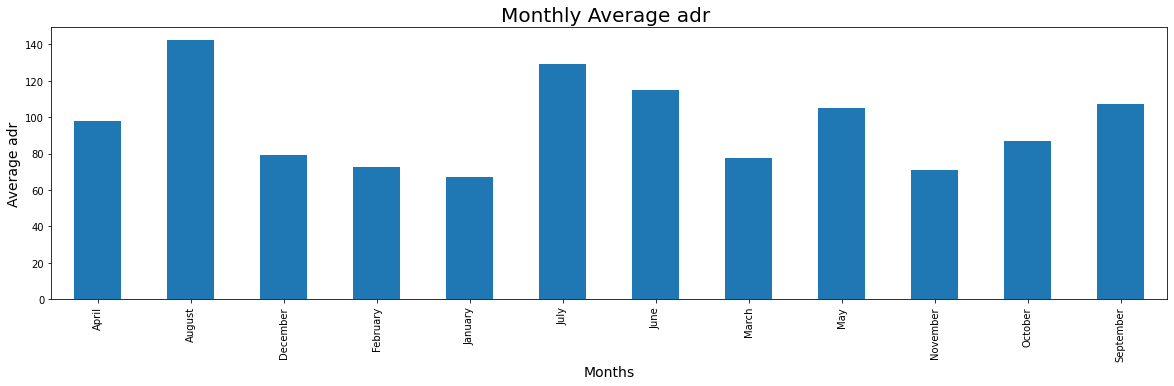

In [62]:
df[df["is_canceled"]=="No"].groupby(['arrival_date_month'])['adr'].mean().plot(kind='bar', figsize=(20,5))
plt.title('Monthly Average adr ', fontsize=20)
plt.xlabel('Months' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

**Conclusion:**

*   Average daily rate was highest in month of August.
*   Average daily rate was lowest in month of January.
*   So best time of year to book a hotel was January.



## **Q2:** The optimal length of stay in order to get the best daily rate?

In [58]:
# creating deep copy to insure that there will no copy and view error warning
non_canceled_df = df[df['is_canceled'] == 'No'].copy(deep=True)
canceled_df = df[df['is_canceled']== 'Yes'].copy(deep=True)

In [59]:
# total stay at hotel will be sum of number of night stay in week and weekend
non_canceled_df['length_of_stay'] = non_canceled_df['stays_in_weekend_nights'] + non_canceled_df['stays_in_week_nights']

Text(0, 0.5, 'Average adr')

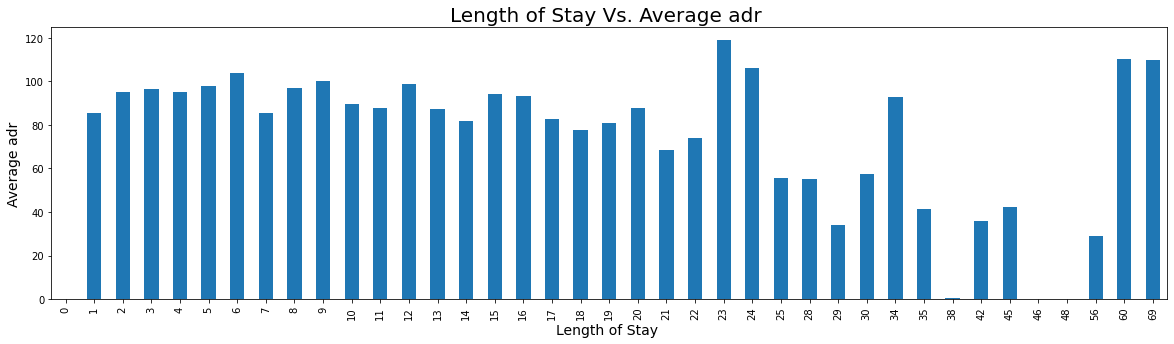

In [60]:
non_canceled_df.groupby(non_canceled_df['length_of_stay'])['adr'].median().plot(kind='bar', figsize=(20,5))
plt.title('Length of Stay Vs. Average adr ', fontsize=20)
plt.xlabel('Length of Stay ' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

## **Q3:** What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

In [65]:
df.total_of_special_requests.unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [67]:
df.groupby(["hotel","total_of_special_requests"]).size().unstack()

total_of_special_requests,0,1,2,3,4,5
hotel,,,,,,
City Hotel,47853,21377,8125,1584,198,26
Resort Hotel,22348,11806,4827,910,142,14


In [68]:
# getting correlated dataframe
corr_non_canceled_df = non_canceled_df.corr()

<AxesSubplot:>

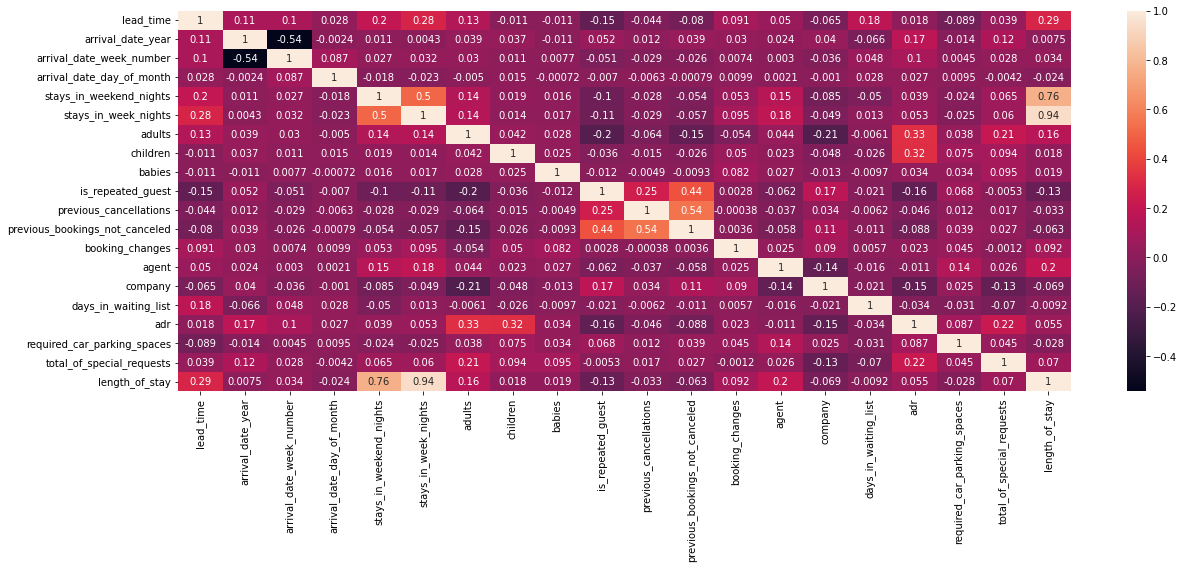

In [69]:
# pltting heatmap with annotation to get correlation values 
plt.figure(figsize=(20,7))
sns.heatmap(corr_non_canceled_df, annot=True)

**Conclusion:**

*   From heatmap, positive correlation of total number of special requests with adr is highest(0.22), then with adults(0.2) & then with arrival year(0.11).

*   So hotel may recieve high number of special request with high adr, adults and arrival year.





Text(0, 0.5, 'Average adr')

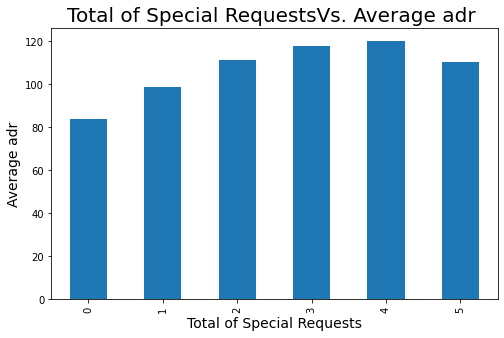

In [70]:
non_canceled_df.groupby(non_canceled_df['total_of_special_requests'])['adr'].median().plot(kind='bar', figsize=(8,5))
plt.title('Total of Special RequestsVs. Average adr ', fontsize=20)
plt.xlabel('Total of Special Requests' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

<AxesSubplot:xlabel='hotel'>

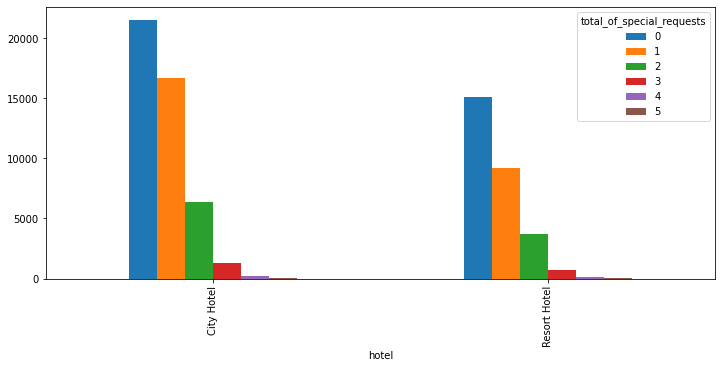

In [74]:
non_canceled_df.groupby(["hotel","total_of_special_requests"]).size().unstack().plot(kind="bar", figsize=(12,5))

Text(0, 0.5, 'Average Total of Special Requests')

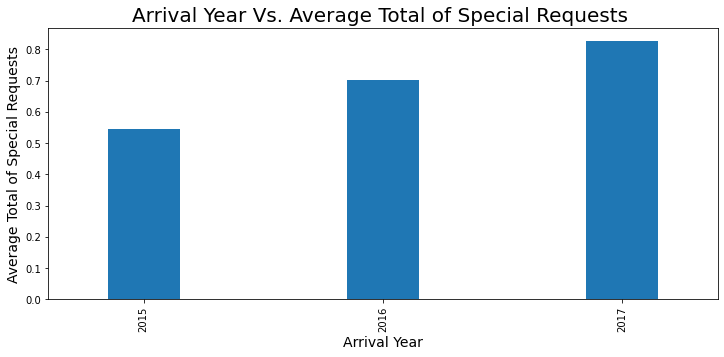

In [76]:
non_canceled_df.groupby(non_canceled_df['arrival_date_year'])['total_of_special_requests'].mean().plot(kind='bar',width=.3, figsize=(12,5))
plt.title('Arrival Year Vs. Average Total of Special Requests ', fontsize=20)
plt.xlabel('Arrival Year' , fontsize=14)
plt.ylabel('Average Total of Special Requests' , fontsize=14)